# Implement Nearest Neighbor
### Interpolation and Resizing (input image- Resize using NNInterpolation and output new resized image)

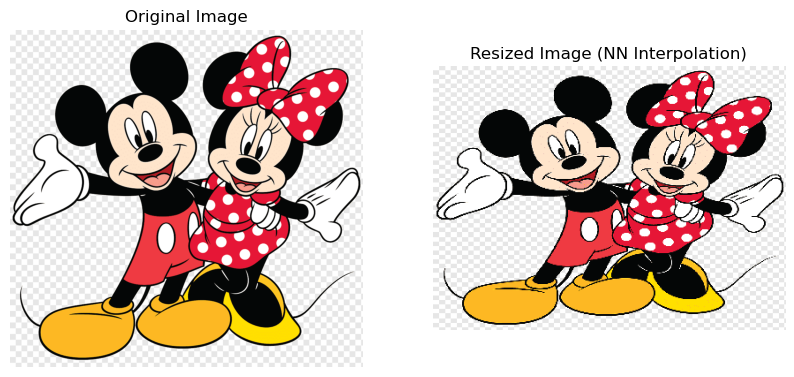

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor_interpolation(image, new_width, new_height):
    original_height, original_width, channels = image.shape
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Calculate the ratio of the original dimensions to the new dimensions
    row_ratio = original_height / new_height
    col_ratio = original_width / new_width

    for i in range(new_height):
        for j in range(new_width):
            # Find the nearest pixel in the original image
            nearest_row = min(int(i * row_ratio), original_height - 1)
            nearest_col = min(int(j * col_ratio), original_width - 1)
            resized_image[i, j] = image[nearest_row, nearest_col]

    return resized_image

def main():
    # Load the input image
    input_image_path = "mickey.png"  # Replace with your input image path
    image = cv2.imread(input_image_path)
    
    if image is None:
        print("Error: Could not load image.")
        return

    # Set new dimensions for resizing
    new_width = 400
    new_height = 300

    # Perform nearest neighbor interpolation resizing
    resized_image = nearest_neighbor_interpolation(image, new_width, new_height)

    # Save and display the output resized image
    output_image_path = "resized_mickey_image.jpg"  # Replace with your desired output image path
    cv2.imwrite(output_image_path, resized_image)

    # Display the images using matplotlib for comparison
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (NN Interpolation)")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()


# Bilinear Interpolation and Resizing
### (input image- Resize using BiLInterpolation and output new resized image)


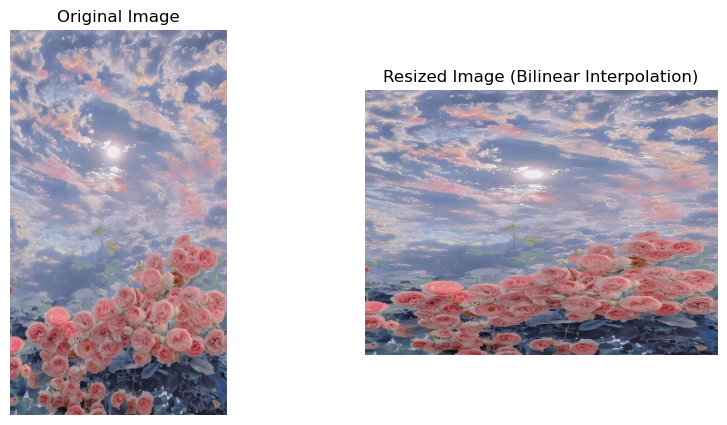

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation(image, new_width, new_height):
    # Get the original dimensions
    original_height, original_width, channels = image.shape
    
    # Create an empty output image
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Calculate the ratio of original dimensions to the new dimensions
    row_ratio = original_height / new_height
    col_ratio = original_width / new_width

    # Loop through each pixel in the new image
    for i in range(new_height):
        for j in range(new_width):
            # Map the coordinates in the resized image to the original image
            original_x = j * col_ratio
            original_y = i * row_ratio

            # Find the coordinates of the four surrounding pixels
            x1 = int(np.floor(original_x))
            y1 = int(np.floor(original_y))
            x2 = min(x1 + 1, original_width - 1)
            y2 = min(y1 + 1, original_height - 1)

            # Calculate the fractional part
            x_weight = original_x - x1
            y_weight = original_y - y1

            # Calculate the interpolated pixel value for each channel
            for c in range(channels):
                top_left = int(image[y1, x1, c])
                top_right = int(image[y1, x2, c])
                bottom_left = int(image[y2, x1, c])
                bottom_right = int(image[y2, x2, c])

                # Perform bilinear interpolation
                top = top_left + x_weight * (top_right - top_left)
                bottom = bottom_left + x_weight * (bottom_right - bottom_left)
                interpolated_value = top + y_weight * (bottom - top)

                # Clip the value to ensure it is within [0, 255]
                resized_image[i, j, c] = np.clip(interpolated_value, 0, 255)

    return resized_image

def main():
    # Load the input image
    input_image_path = "spring.jpg"  # Replace with your input image path
    image = cv2.imread(input_image_path)
    
    if image is None:
        print("Error: Could not load image.")
        return

    # Set new dimensions for resizing
    new_width = 400
    new_height = 300

    # Perform bilinear interpolation resizing
    resized_image = bilinear_interpolation(image, new_width, new_height)

    # Save and display the output resized image
    output_image_path = "resized_spring_image_bilinear.jpg"  # Replace with your desired output image path
    cv2.imwrite(output_image_path, resized_image)

    # Display the images using matplotlib for comparison
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (Bilinear Interpolation)")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()


# Implement Convolution
### (input Image – Convolved image)

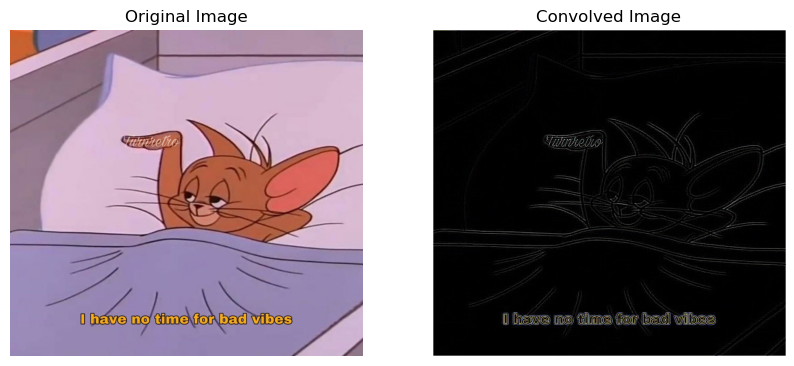

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_convolution(image, kernel):
    # Get the dimensions of the input image
    image_height, image_width, channels = image.shape
    
    # Get the dimensions of the kernel
    kernel_height, kernel_width = kernel.shape
    
    # Compute the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the input image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    
    # Prepare the output convolved image
    convolved_image = np.zeros((image_height, image_width, channels), dtype=np.float32)
    
    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            for c in range(channels):
                # Extract the current region of interest
                region = padded_image[i:i+kernel_height, j:j+kernel_width, c]
                
                # Perform element-wise multiplication and summation
                convolved_value = np.sum(region * kernel)
                
                # Assign the value to the convolved image (clipping to valid range)
                convolved_image[i, j, c] = np.clip(convolved_value, 0, 255)
                
    # Convert the convolved image to uint8
    convolved_image = convolved_image.astype(np.uint8)
    
    return convolved_image

def main():
    # Load the input image
    input_image_path = "jerry.jpg"  # Replace with your input image path
    image = cv2.imread(input_image_path)
    
    if image is None:
        print("Error: Could not load image.")
        return

    # Define a kernel (for example, an edge detection kernel)
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

    # Apply convolution to the image
    convolved_image = apply_convolution(image, kernel)

    # Save and display the output convolved image
    output_image_path = "convolved_jerry_image.jpg"  # Replace with your desired output image path
    cv2.imwrite(output_image_path, convolved_image)

    # Display the images using matplotlib for comparison
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Convolved Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(convolved_image, cv2.COLOR_BGR2RGB))
    plt.title("Convolved Image")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()


# Gaussian Filter
### ( input image- Apply Gaussian filter-Output filtered image)


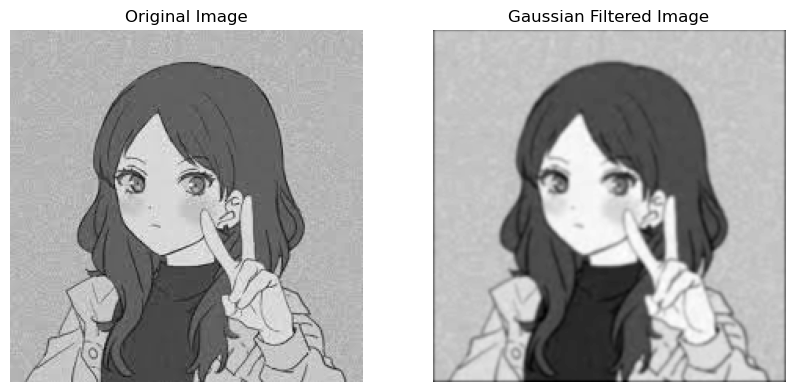

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    
    for x in range(size):
        for y in range(size):
            diff = (x - center) ** 2 + (y - center) ** 2
            kernel[x, y] = math.exp(-diff / (2 * sigma ** 2))
    
    kernel /= 2 * math.pi * sigma ** 2
    kernel /= kernel.sum()
    return kernel

# Function to apply convolution to an image using a given kernel
def convolve(image, kernel):
    kernel_size = kernel.shape[0]
    pad_width = kernel_size // 2
    
    # Pad the image with zeros on the border
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Prepare an output image
    output = np.zeros_like(image)
    
    # Convolve the kernel over every pixel of the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)
    
    return output

def main():
    # Load the input image (grayscale for simplicity)
    input_image_path = "anime.jfif"  # Replace with your input image path
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Could not load image.")
        return

    # Set parameters for the Gaussian filter
    kernel_size = 5  # Size of the kernel (e.g., 3, 5, 7, etc.)
    sigma = 1.0  # Standard deviation for Gaussian distribution

    # Generate Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian filter to the image
    filtered_image = convolve(image, kernel)

    # Save and display the output filtered image
    output_image_path = "gaussian_filtered_anime_image.jpg"  # Replace with your desired output image path
    cv2.imwrite(output_image_path, filtered_image)

    # Display the images using matplotlib for comparison
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    # Filtered Image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Gaussian Filtered Image")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()
